In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df_centers = pd.read_excel("GeographicCentres.xlsx")
df_gdp = pd.read_excel("WorldBankGDP.xlsx",sheet_name=0)

In [47]:
df_centers.head()

,country,latitude,longitude,name,continent
0,AD,42.546245,1.601554,Andorra,Europe & Central Asia
1,AE,23.424076,53.847818,United Arab Emirates,Middle East
2,AF,33.939110,67.709953,Afghanistan,South Asia
3,AG,17.060816,-61.796428,Antigua and Barbuda,Latin America & Caribbean
4,AI,18.220554,-63.068615,Anguilla,NaN


In [48]:
df_gdp.head()

,Country Name,Country Code,Continent,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Latin America & Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,0,1.929944e+10,1.970954e+10,2.147872e+10,2.571501e+10,2.351080e+10,2.679160e+10,2.913154e+10,...,9.427109e+11,9.498491e+11,9.635604e+11,9.837486e+11,9.186471e+11,8.720235e+11,9.842556e+11,1.011723e+12,1.008375e+12,9.188155e+11
2,Afghanistan,AFG,South Asia,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,0,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,...,6.709626e+11,7.275714e+11,8.207876e+11,8.514872e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11
4,Angola,AGO,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10


In [49]:
df_centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    244 non-null    object 
 1   latitude   244 non-null    float64
 2   longitude  244 non-null    float64
 3   name       245 non-null    object 
 4   continent  202 non-null    object 
dtypes: float64(2), object(3)
memory usage: 9.7+ KB


In [50]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 64 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   Continent     266 non-null    object 
 3   1960          128 non-null    float64
 4   1961          134 non-null    float64
 5   1962          137 non-null    float64
 6   1963          137 non-null    float64
 7   1964          137 non-null    float64
 8   1965          148 non-null    float64
 9   1966          151 non-null    float64
 10  1967          154 non-null    float64
 11  1968          159 non-null    float64
 12  1969          159 non-null    float64
 13  1970          168 non-null    float64
 14  1971          171 non-null    float64
 15  1972          171 non-null    float64
 16  1973          171 non-null    float64
 17  1974          172 non-null    float64
 18  1975          174 non-null    

## Start process as descibed in the URL below, all credits go to The Economist for their excellent data viz.

https://github.com/TheEconomist/graphic-detail-data/tree/master/data/2018-10-27_chinese-century

#### Convert Latitude and Longitude to Cartesian Coordinates

In [51]:
earthRadius = 1 #radius of earth in km (6367)
def to_cartesian(lat, lon):
    lat = lat / 180 * np.pi
    lon = lon / 180 * np.pi
    x = earthRadius * np.cos(lat)*np.cos(lon);
    y = earthRadius * np.cos(lat)*np.sin(lon);
    z = earthRadius * np.sin(lat);
    return (x, y, z)

df_centers["x"],df_centers["y"],df_centers["z"] = to_cartesian(df_centers["latitude"],
                                                               df_centers["longitude"])

In [52]:
df_centers.head()

,country,latitude,longitude,name,continent,x,y,z
0,AD,42.546245,1.601554,Andorra,Europe & Central Asia,0.736444,0.020591,0.676185
1,AE,23.424076,53.847818,United Arab Emirates,Middle East,0.541314,0.740909,0.397534
2,AF,33.939110,67.709953,Afghanistan,South Asia,0.314675,0.767638,0.558312
3,AG,17.060816,-61.796428,Antigua and Barbuda,Latin America & Caribbean,0.451808,-0.842493,0.293387
4,AI,18.220554,-63.068615,Anguilla,NaN,0.430214,-0.846847,0.312676


#### Create main dataframe

In [53]:
df = df_centers.merge(df_gdp, left_on="name",right_on="Country Name")
df.head()

,country,latitude,longitude,name,continent,x,y,z,Country Name,Country Code,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AD,42.546245,1.601554,Andorra,Europe & Central Asia,0.736444,0.020591,0.676185,Andorra,AND,...,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.155065e+09,NaN
1,AE,23.424076,53.847818,United Arab Emirates,Middle East,0.541314,0.740909,0.397534,United Arab Emirates,ARE,...,3.506660e+11,3.745906e+11,3.901076e+11,4.031371e+11,3.581351e+11,3.570451e+11,3.856055e+11,4.222150e+11,4.172156e+11,3.588688e+11
2,AF,33.939110,67.709953,Afghanistan,South Asia,0.314675,0.767638,0.558312,Afghanistan,AFG,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,AG,17.060816,-61.796428,Antigua and Barbuda,Latin America & Caribbean,0.451808,-0.842493,0.293387,Antigua and Barbuda,ATG,...,1.137637e+09,1.199948e+09,1.181448e+09,1.249733e+09,1.336693e+09,1.436585e+09,1.467978e+09,1.605944e+09,1.687533e+09,1.370281e+09
4,AL,41.153332,20.168331,Albania,Europe & Central Asia,0.706783,0.259602,0.658076,Albania,ALB,...,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10,1.540024e+10,1.488763e+10


In [54]:
print ("Length of centers dataframe: ", len(df_centers))
print ("Length of final dataframe: ", len(df))

Length of centers dataframe:  245
Length of final dataframe:  202


In [55]:
#not in main frame
df_centers[df_centers['name'].isin(df["name"])==False]

,country,latitude,longitude,name,continent,x,y,z
4,AI,18.220554,-63.068615,Anguilla,NaN,0.430214,-0.846847,0.312676
7,AN,12.226079,-69.060087,Netherlands Antilles,NaN,0.349283,-0.912773,0.211770
9,AQ,-75.250973,-0.071389,Antarctica,NaN,0.254585,-0.000317,-0.967050
26,BN,4.535277,114.727669,Brunei,NaN,-0.416996,0.905462,0.079073
29,BS,25.034280,-77.396280,Bahamas,NaN,0.197707,-0.884221,0.423160
31,BV,-54.423199,3.413194,Bouvet Island,NaN,0.580762,0.034638,-0.813336
36,CC,-12.164165,96.870956,Cocos [Keeling] Islands,NaN,-0.116948,0.970527,-0.210713
42,CK,-21.236736,-159.777671,Cook Islands,NaN,-0.874636,-0.322190,-0.362222
50,CX,-10.447525,105.690449,Christmas Island,NaN,-0.265956,0.946776,-0.181335
62,EH,24.215527,-12.885834,Western Sahara,NaN,0.889041,-0.203386,0.410170


Main dataframe is complete, all relevant countries are already included

#### Calculate the weighted average of cartesian coordinates

In [56]:
#fill nan values with zeros - makes it possible to compute average
years = list(range(1960,2021))
df[years] = df[years].fillna(0)

In [57]:
#generate dataframe of centers
def get_centers(data,start_year=1960,end_year=2020):
    dict_centers = {"year":[],"x":[],"y":[],"z":[]}
    years = list(range(start_year,end_year+1))
    for year in years:
        center_x = np.average(data["x"],weights=data[year])
        center_y = np.average(data["y"],weights=data[year])
        center_z = np.average(data["z"],weights=data[year])
        dict_centers["year"].append(year)
        dict_centers["x"].append(center_x)
        dict_centers["y"].append(center_y)
        dict_centers["z"].append(center_z)
    dataframe_centers = pd.DataFrame(dict_centers)
    return dataframe_centers

In [58]:
df_final = get_centers(df)
df_final.tail()

,year,x,y,z
56,2016,0.103315,0.043369,0.534590
57,2017,0.103272,0.050187,0.530223
58,2018,0.101416,0.060222,0.536091
59,2019,0.095257,0.059171,0.537095
60,2020,0.087610,0.068864,0.544421


#### Convert cartesian coordinates back to spherical coordinates

In [59]:
def to_spherical(x, y, z):
    lat = np.arcsin(z) / np.pi * 180
    lon = np.arctan2(y, x) / np.pi * 180
    return (lat,lon)

In [60]:
spherical_lat, spherical_lon = to_spherical(df_final["x"],df_final["y"],df_final["z"])
df_final["spherical_lat"] = spherical_lat
df_final["spherical_lon"] = spherical_lon

#### Plot on world map

In [61]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
        lon = df_final['spherical_lon'],
        lat = df_final['spherical_lat'],
        mode = 'markers',
        text = df_final['year'],
        marker_color = df_final['year'],
        ))

fig.update_layout(
        title = 'Global economic centre of gravity',
        geo_scope='world'
    )
fig.show()

In [62]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
        lon = df_final['spherical_lon'],
        lat = df_final['spherical_lat'],
        mode = 'markers',
        text = df_final['year'],
        marker_color = df_final['year'],
        ))

fig.update_layout(
        title = 'Global economic centre of gravity',
        geo_scope='world',
        geo = dict(projection = {'type':'orthographic'},
                       scope='world', 
                       showlakes = False)
    )
fig.show()

### Now finalize with only african data

In [63]:
african_gdps = df[df["continent"].isin(["North Africa","Sub-Saharan Africa"])]
africa_df_final = get_centers(african_gdps)
africa_df_final.tail()

,year,x,y,z
56,2016,0.863440,0.271388,0.097622
57,2017,0.864950,0.266543,0.065398
58,2018,0.865023,0.264331,0.068423
59,2019,0.864531,0.268479,0.083162
60,2020,0.862255,0.274550,0.102766


In [64]:
africa_spherical_lat, africa_spherical_lon = to_spherical(africa_df_final["x"],africa_df_final["y"],africa_df_final["z"])
africa_df_final["spherical_lat"] = africa_spherical_lat
africa_df_final["spherical_lon"] = africa_spherical_lon

In [65]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
        lon = africa_df_final['spherical_lon'],
        lat = africa_df_final['spherical_lat'],
        mode = 'markers',
        text = africa_df_final['year'],
        marker_color = africa_df_final['year'],
        ))

fig.update_layout(
        title = 'African economic centre of gravity',
        geo_scope='world',
        geo = dict(projection = {'type':'orthographic'},
                       scope='world', 
                       showlakes = True,
                       lataxis = dict(
                                    showgrid = True,
                                    dtick = 10
                                ),
                        lonaxis = dict(
                            showgrid = True,
                            dtick = 20
                        )),
            geo_projection_rotation_lon=15,
            geo_projection_rotation_lat=0,
    )
fig.show()

### African plot didnt yield interesting data

#### Remove influence of africa on world gdp

In [66]:
without_africa = df[~df["continent"].isin(["North Africa","Sub-Saharan Africa"])]
df_final_removed = get_centers(without_africa)
df_final_removed.tail()

,year,x,y,z
56,2016,0.080083,0.036400,0.547945
57,2017,0.081078,0.043883,0.543768
58,2018,0.079293,0.054309,0.549640
59,2019,0.072368,0.052943,0.550602
60,2020,0.064664,0.062771,0.557503


In [67]:
spherical_lat_removed, africa_spherical_lon_removed = to_spherical(df_final_removed["x"],df_final_removed["y"],df_final_removed["z"])
df_final_removed["spherical_lat"] = spherical_lat_removed
df_final_removed["spherical_lon"] = africa_spherical_lon_removed



In [68]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
        lon = df_final_removed['spherical_lon'],
        lat = df_final_removed['spherical_lat'],
        mode = 'markers',
        text = df_final_removed['year'],
        marker_color = df_final_removed['year'],
        ))

fig.update_layout(
        title = 'African economic centre of gravity',
        geo_scope='world',
        geo = dict(projection = {'type':'orthographic'},
                       scope='world', 
                       showlakes = False)
    )
fig.show()

#### Mix both world plots together

In [69]:
include_years = [1960,1970,1980,1990,2000,2010,2020]
df_final_plot = df_final[df_final["year"].isin(include_years)]
df_final_removed_plot = df_final_removed[df_final_removed["year"].isin(include_years)]

In [70]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scattergeo(
        lon = df_final_plot['spherical_lon'],
        lat = df_final_plot['spherical_lat'],
        mode = 'markers',
        text = df_final_plot['year'],
        marker_color = "red",
        ),
        go.Scattergeo(
        lon = df_final_removed_plot['spherical_lon'],
        lat = df_final_removed_plot['spherical_lat'],
        mode = 'markers',
        text = df_final_removed_plot['year'],
        marker_color = "blue",
        )])

fig.update_layout(
        title = 'African economic centre of gravity',
        geo_scope='world',
        geo = dict(projection = {'type':'orthographic'},
                       scope='world', 
                       showlakes = False,
                       lataxis = dict(
                                    showgrid = True,
                                    dtick = 10
                                ),
                        lonaxis = dict(
                            showgrid = True,
                            dtick = 20
                        )
                  ),
        geo_projection_rotation_lon=-15,
        geo_projection_rotation_lat=45,
    
    )

fig.write_image("Gravitational.svg")
fig.show()

##### Plot edited africa again

In [71]:
include_years = [1960,1970,1980,1990,2000,2010,2020]
africa_df_final_plot = africa_df_final[africa_df_final["year"].isin(include_years)]

In [77]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
        lon = africa_df_final_plot['spherical_lon'],
        lat = africa_df_final_plot['spherical_lat'],
        mode = 'markers',
        text = africa_df_final_plot['year'],
        marker_color = africa_df_final_plot['year'],
        ))

fig.update_layout(
        title = 'African economic centre of gravity',
        geo_scope='world',
        geo = dict(projection = {'type':'orthographic'},
                       scope='world', 
                       showlakes = True,
                       lataxis = dict(
                                    showgrid = True,
                                    dtick = 10
                                ),
                        lonaxis = dict(
                            showgrid = True,
                            dtick = 20
                        )),
            geo_projection_rotation_lon=15,
            geo_projection_rotation_lat=0,
    )

fig.write_image("AfricaCentric.svg")
fig.show()

##### How much has difference has africa made over the years?

In [73]:
def calculate_diff(df1,df2):
    sub_lon = df2["spherical_lon"] - df1["spherical_lon"]
    sub_lat = df2["spherical_lat"] - df1["spherical_lat"]
    result_diff = np.sqrt((sub_lon)**2+(sub_lat)**2)
    return result_diff

In [74]:
yearly_differences = calculate_diff(df_final,df_final_removed)

In [75]:
df_differences = pd.DataFrame({"year": list(range(1960,2021)),"magnitude_diff": yearly_differences})
df_differences = df_differences.set_index("year")

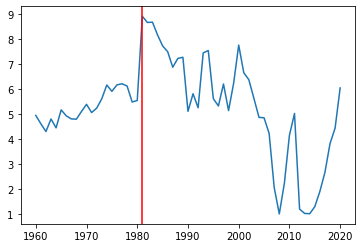

In [80]:
plt.plot(df_differences["magnitude_diff"])
plt.savefig("AfricaEffect")
plt.axvline(x=1981,c="r")
plt.show()